## Solving Equations in Python

The **odeint** function requires a function (called **deriv** in the example below) that will return the first derivative of each of element in the array. In other words, the first element returned is $dx[0]/dt$
 and the second element is $dx[1]/dt$
, which are both functions of $x[0]$
 and $x[1]$
. You must also provide initial values for $x[0]$
 and $x[1]$
, which are placed in the array yinit
 in the example below. Finally, the values of the times at which solutions are desired are provided in the array time
. Note that "odeint" returns the values of both the function $x[0]=x$
 and its derivative $x[1]=dx/dt$
 at each time in an array x
. The function is plotted versus time.

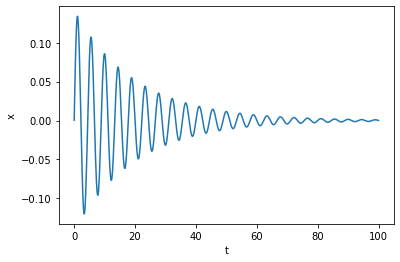

In [3]:
from scipy.integrate import odeint
from pylab import *  # for plotting commands

def deriv(x,t):  # return derivatives of the array y
    a = -2.0
    b = -0.1
    return array([ x[1], a*x[0]+b*x[1]])

time = linspace(0.0,100.0,1000)
xinit = array([0.0005,0.2])  # initial values
x = odeint(deriv,xinit,time)

figure()
plot(time,x[:,0])  # x[:,0] is the first column of x
xlabel('t')
ylabel('x')
show()

For a second example, suppose that you want to solve two coupled, second-order differential equations.
$d^2x/dt^2=ay$
and
$d^2y/dt^2=b+cdx/dt$.

The two second-order equations can be written as the four first-order equations.
$dz[0]/dt=z[1]$,
$dz[1]/dt=az[2]$,
$dz[2]/dt=z[3]$,
and
$dz[3]/dt=b+cz[1]$.

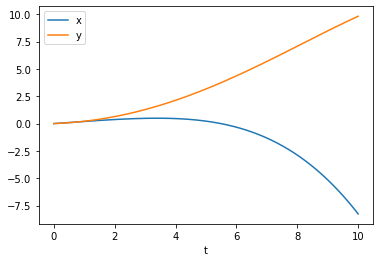

In [4]:
from scipy.integrate import odeint
from pylab import *  # for plotting commands

def deriv(z,t):  # return derivatives of the array y
    a = -0.1
    b = 0.2
    c = 0.1
    return array([z[1], a*z[2], z[3], b+c*z[1]])

time = linspace(0.0,10.0,1000)
zinit = array([0,0.2,0,0.1])  # initial values
z = odeint(deriv,zinit,time)

figure()
plot(time,z[:,0],label='x')  # z[:,0] is the first column of z
plot(time,z[:,2],label='y')  # z[:,2] is the third column of z
xlabel('t')
legend(loc='upper left')
show()

## Euler Method

We can numerically solve the differential equation
$d^2x/dt^2=−kx$

The first part of the program prepares for the calculation. The pylab library is imported so that the results can be plotted. 
Each "d" is a dot in the shorthand notation for derivatives
The constant, initial values of x
, xd
, and xdd
, time step dt
, and final time tf
 are set. Three empty lists (t_list
, x_list
, and xd_list
) are created to hold the results. The inital values of t
, x
, and xd
 are appended to these lists.

In [5]:
from pylab import *

# constants
k = 5

# set inital values, time step, & final time
t = 0
x = 10
xd = 0
dt = 0.001
tf = 10

# make empty lists & append initial values to lists
t_list = [] 
x_list = []
xd_list = []
t_list.append(t)
x_list.append(x)
xd_list.append(xd)

In [6]:
while (t < tf):
    # calculate new values
    xdd = -k*x       # Calculate d2x/dt2 using the current x & dx/dt
    xd = xd + xdd*dt # Use d2x/dt2 to update dx/dt
    x = x + xd*dt   # Use the updated dx/dt to update x
    t = t + dt      # Advance t by a step dt
    # append new values to lists
    t_list.append(t)
    x_list.append(x)
    xd_list.append(xd)

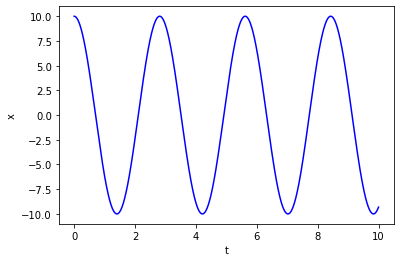

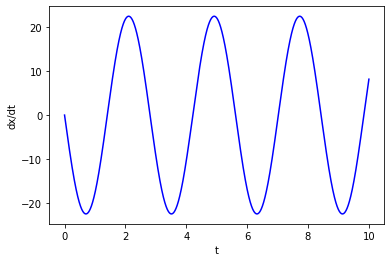

In [7]:
# plot the x and dx/dt vs. time (from the lists)
figure()
plot(t_list,x_list, ls='-', c='b')
xlabel('t')
ylabel('x')

figure()
plot(t_list,xd_list, ls='-', c='b')
xlabel('t')
ylabel('dx/dt')

show()

## Numerical Integration

In [8]:
%matplotlib inline
from math import *
from pylab import *
from scipy.integrate import quad #.integrate import *

The integrand must be defined as a function (called intgrd1 below). In the simplest case, the integrand only depends on the variable of integration. The other arguments of the quad function are the integrand, the lower limit, and the upper limit. It returns both the result and an estimate of the error.

In [9]:
def intgrnd1(x):
    return cos(x)**2

result, err = quad(intgrnd1, 0.0, 1.0)
print(result)

0.7273243567064205


In [10]:
def intgrl1(xup): # make the upper limit a variable
    return quad(intgrnd1, 0.0, xup)

print(intgrl1(2.0))

(0.8107993761730178, 9.001681357789979e-15)


The lines below make vectorized version of the function (vec_intgrl1), which has a different name than the original function. It returns the integral for each upper limit in the list (xupper) and their uncertainty estimates.

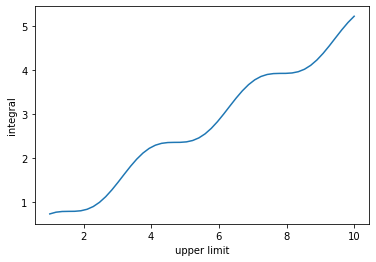

In [11]:
vec_intgrl1 = vectorize(intgrl1)
xupper = linspace(1.0, 10.0, 50) # make a list of upper limits
results, errs = vec_intgrl1(xupper)
figure()
plot(xupper, results)
xlabel('upper limit')
ylabel('integral')
show()

It is also possible to perform an integral that depends on another parameter in addition to the variable of integration. The function intgrnd2 is defined as a function of the parameter n. The function intgrl2 returns the integral as a funciton of the parameter, with the limits of the integration fixed. After the function is vectorized (called vec_intgrl2), the values of the integral for the each parameter in a list can be found. 

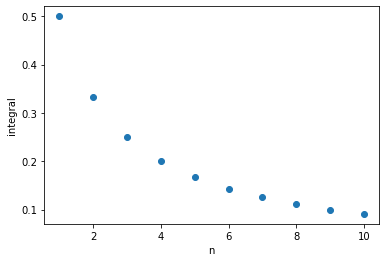

In [12]:
def intgrnd2(x, n):
    return x**n

def intgrl2(m): # make the parameter a variable
    return quad(intgrnd2, 0.0, 1.0, args=(m))

vec_intgrl2 = vectorize(intgrl2)

nlist = linspace(1, 10, 10)
results, errs = vec_intgrl2(nlist)

figure() # opens a new figure
scatter(nlist, results)
xlabel('n')
ylabel('integral')
show()

## Root Finding

Find the solution of a transcendental equation. For example, you might want to know what values of $x$
 that solve the equation
$\sin(x)=2x\cos(x)$.

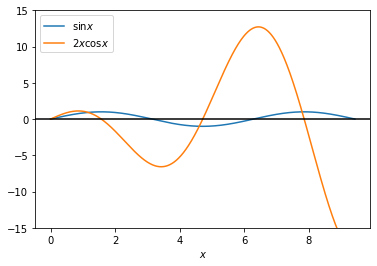

In [13]:
from pylab import * 
#from scipy import *

x = linspace(0,3*pi,1000)
yL = sin(x)
yR = 2*x*cos(x)

figure()
plot(x,yL,label=r'$\sin x$')
plot(x,yR,label=r'$2x\cos x$')
legend(loc='upper left')
ylim(-15,15)
xlabel(r'$x$')
axhline(y=0, c="k") # draw horizontal line at y=0
show()

Another way to find the solution graphically is to plot the difference of the two sides of the original equation.

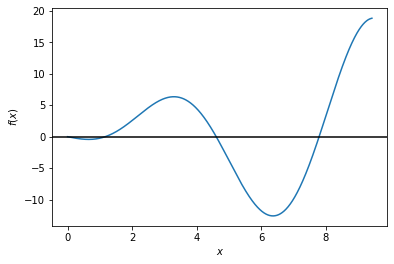

In [14]:
x = linspace(0,3*pi,1000)
fx = sin(x) - 2*x*cos(x)

figure()
plot(x,fx)
#ylim(-15,15)
xlabel(r'$x$')
ylabel(r'$f(x)$')
axhline(y=0, c="k") # draw horizontal line at y=0
show()

In [15]:
from scipy import optimize

# Define the function
def f(x):
    return sin(x) - 2*x*cos(x)

# The function has roots between 0, pi, 2*pi, etc.
for n in arange(10):
    print(optimize.brentq(f, n*pi, (n+1)*pi))

0.0
4.604216777200577
7.789883751144127
10.949943648541158
14.101725133565873
17.249781834607894
20.395842357309167
23.540708292304693
26.684802490925243
29.828369213095566
